# Importing Library & Dataset

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [125]:
df = pd.read_csv('CO2_Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Exploratory Data Analysis

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [127]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [128]:
df.shape

(7385, 12)

In [129]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [130]:
df.duplicated().sum()

np.int64(1103)

In [131]:
df.drop_duplicates(inplace=True)

In [132]:
df.shape

(6282, 12)

In [133]:
df.rename(columns={ 'Make': 'make',
                    'Model': 'model',
                    'Vehicle Class': 'vehicle_class',
                    'Engine Size(L)': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'Fuel Type': 'fuel_type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
                    'CO2 Emissions(g/km)': 'co2'}, inplace=True)

In [134]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'fuel_cons_comb_mpg', 'co2'],
      dtype='object')

Text(0.5, 1.0, 'Make')

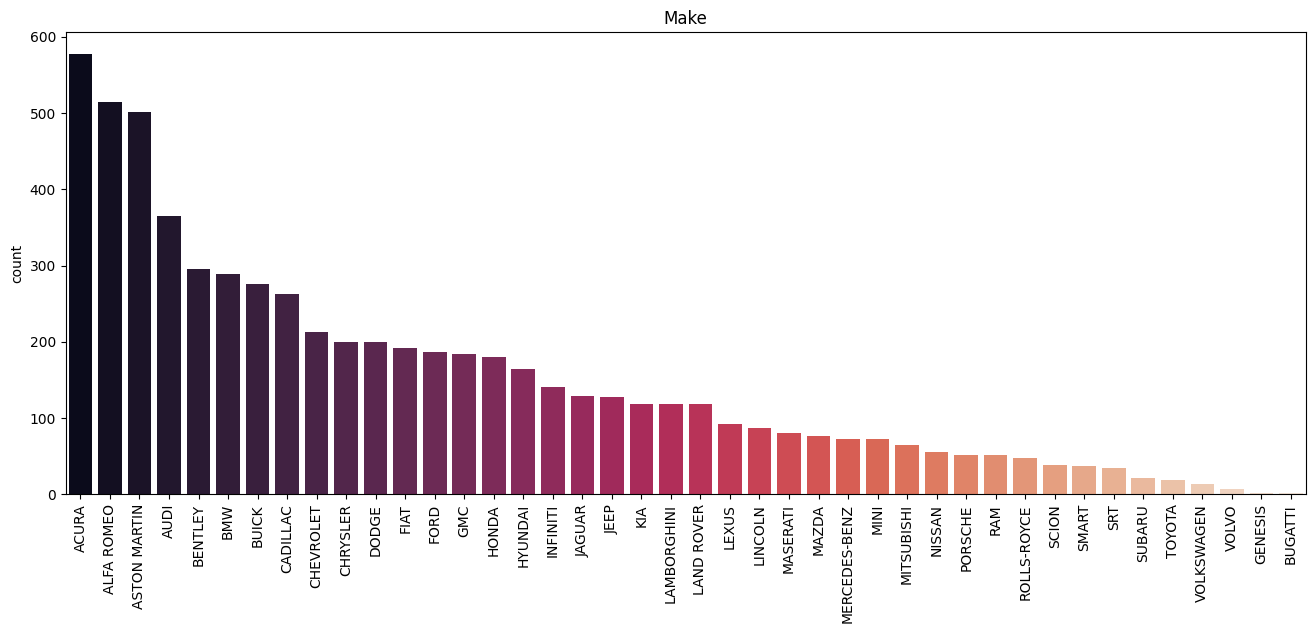

In [135]:
x = df['make'].unique()
y = df['make'].value_counts()

plt.figure(figsize=(16,6))
sns.barplot(x=x, y=y, palette="rocket", hue=x)
plt.xticks(rotation=90) 
plt.title("Make")

Text(0.5, 1.0, 'Vehicle Class')

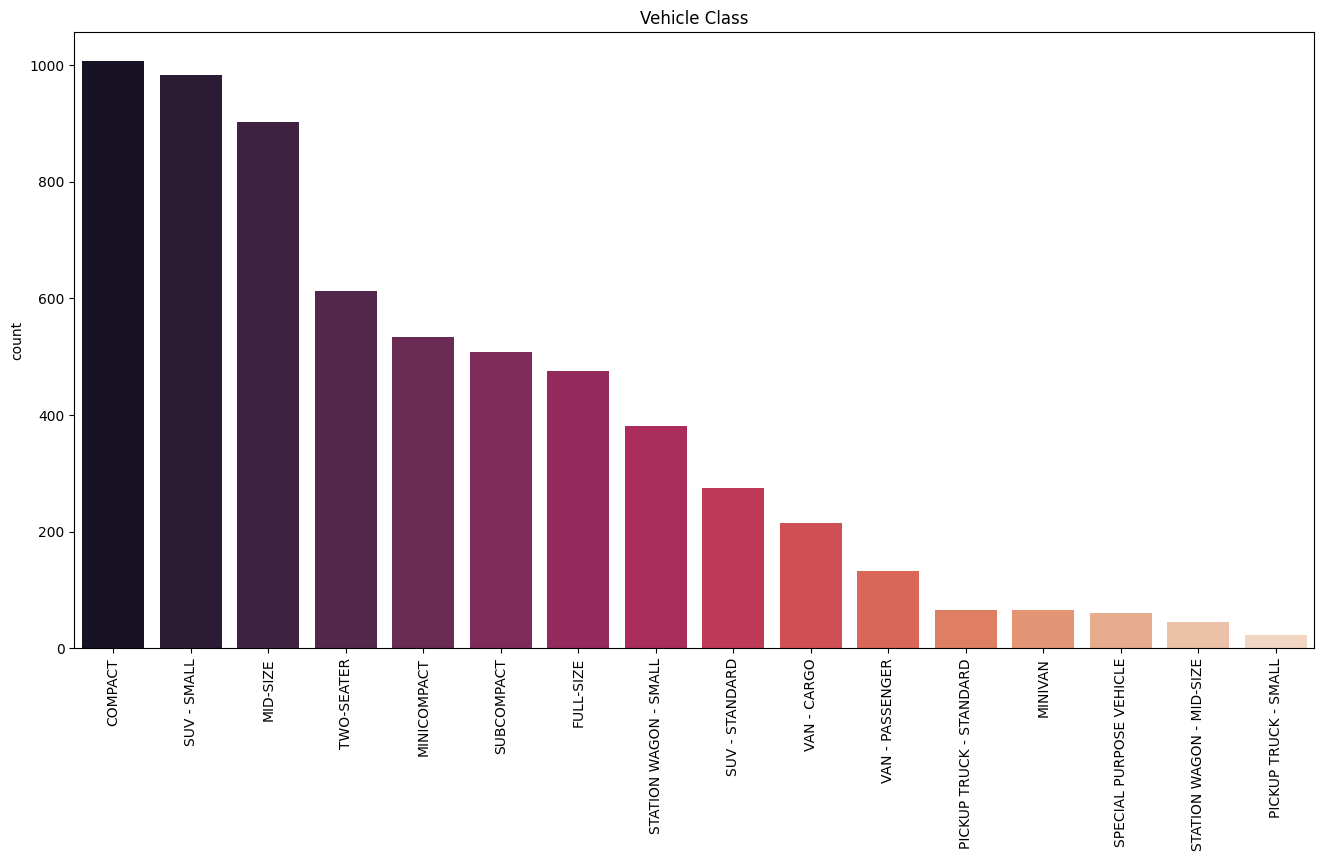

In [136]:
x = df['vehicle_class'].unique()
y = df['vehicle_class'].value_counts()

plt.figure(figsize=(16,8))
sns.barplot(x=x, y=y, palette="rocket", hue=x)
plt.xticks(rotation=90)
plt.title("Vehicle Class")

Text(0.5, 1.0, 'engine Size')

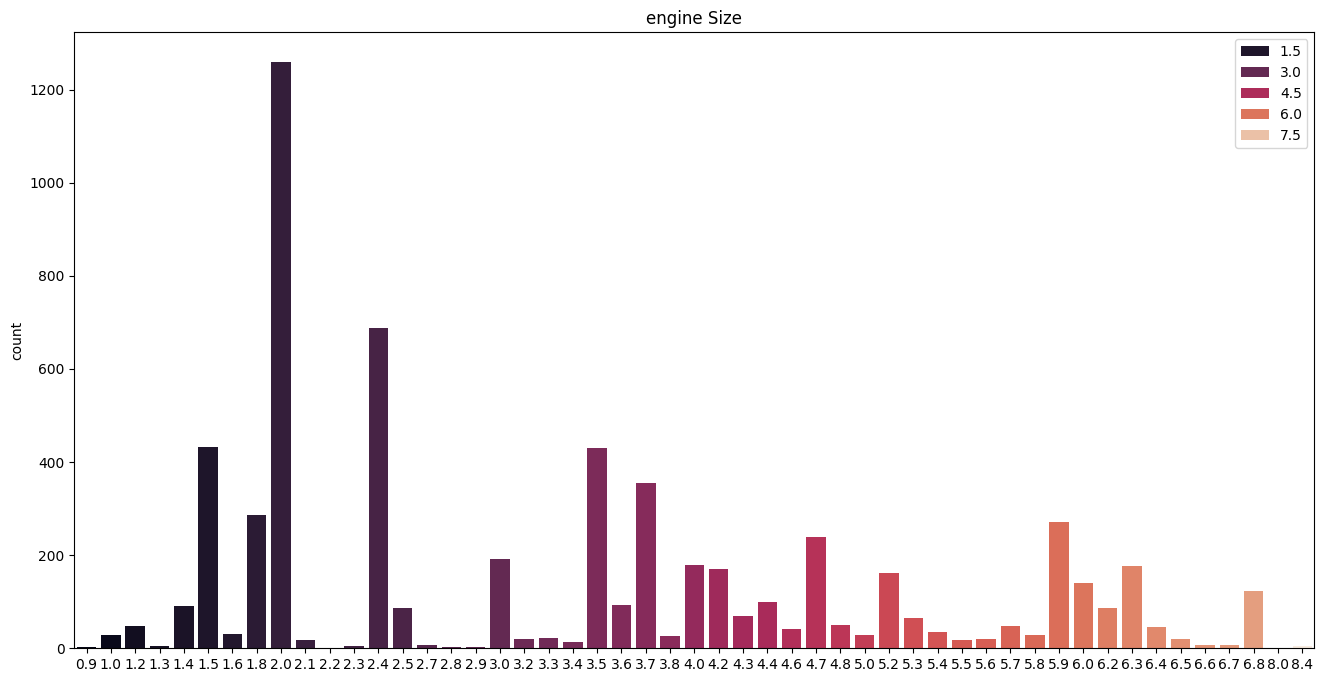

In [137]:
x = df['engine_size'].unique()
y = df['engine_size'].value_counts()

plt.figure(figsize=(16,8))
sns.barplot(x=x, y=y, palette="rocket", hue=x)
plt.title("engine Size")

<Axes: xlabel='None', ylabel='co2'>

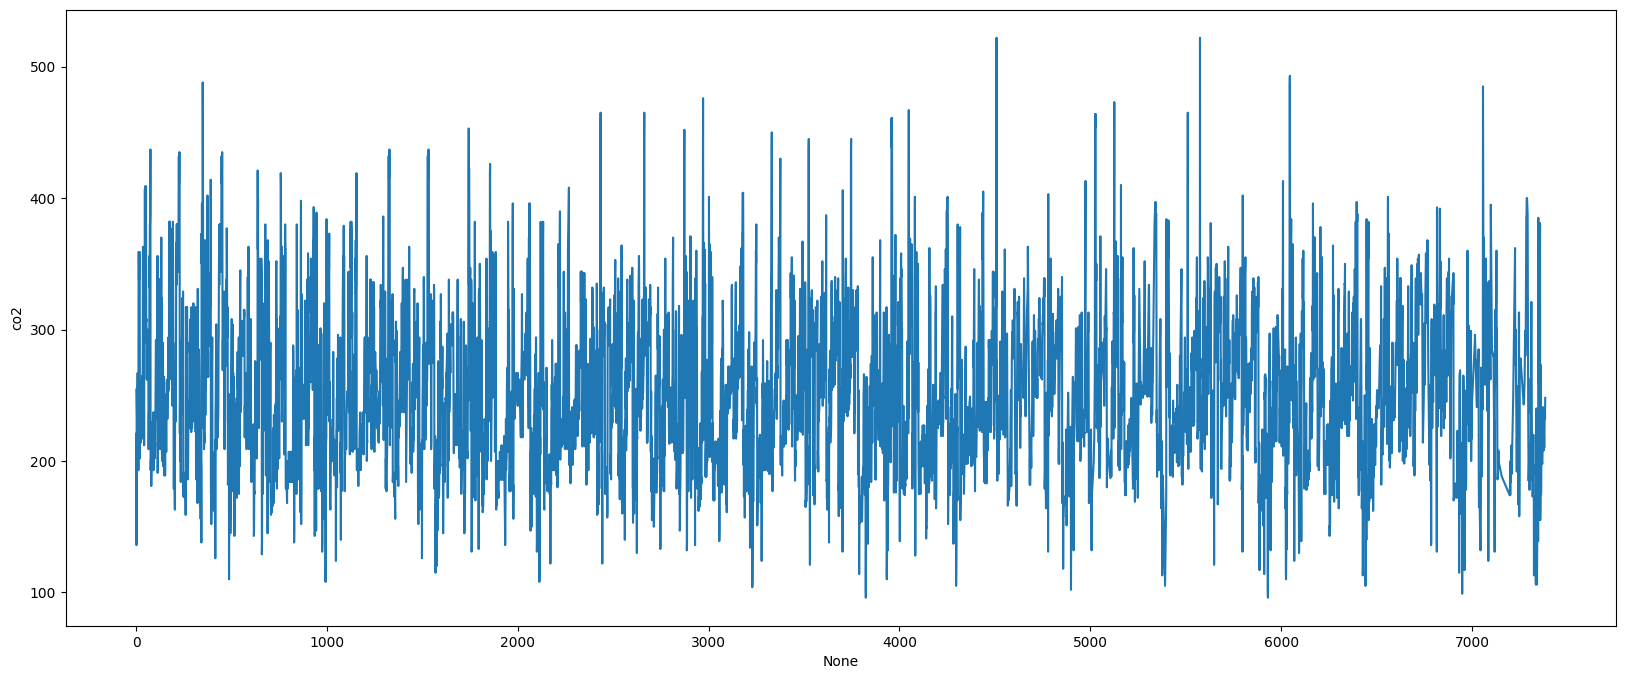

In [138]:
plt.figure(figsize=(20,8))
sns.lineplot(x=df.index, y=df['co2'])

<Axes: xlabel='make', ylabel='co2'>

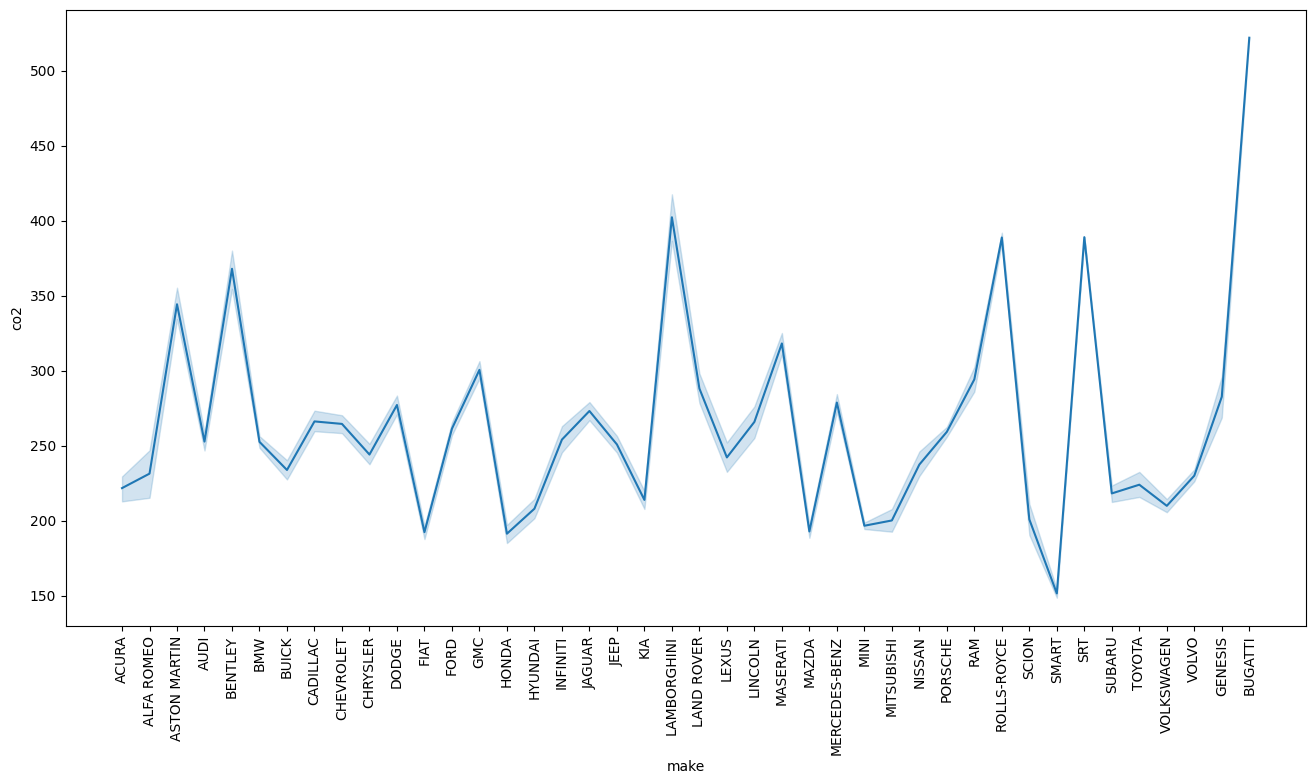

In [139]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.lineplot(x=df['make'], y=df['co2'])

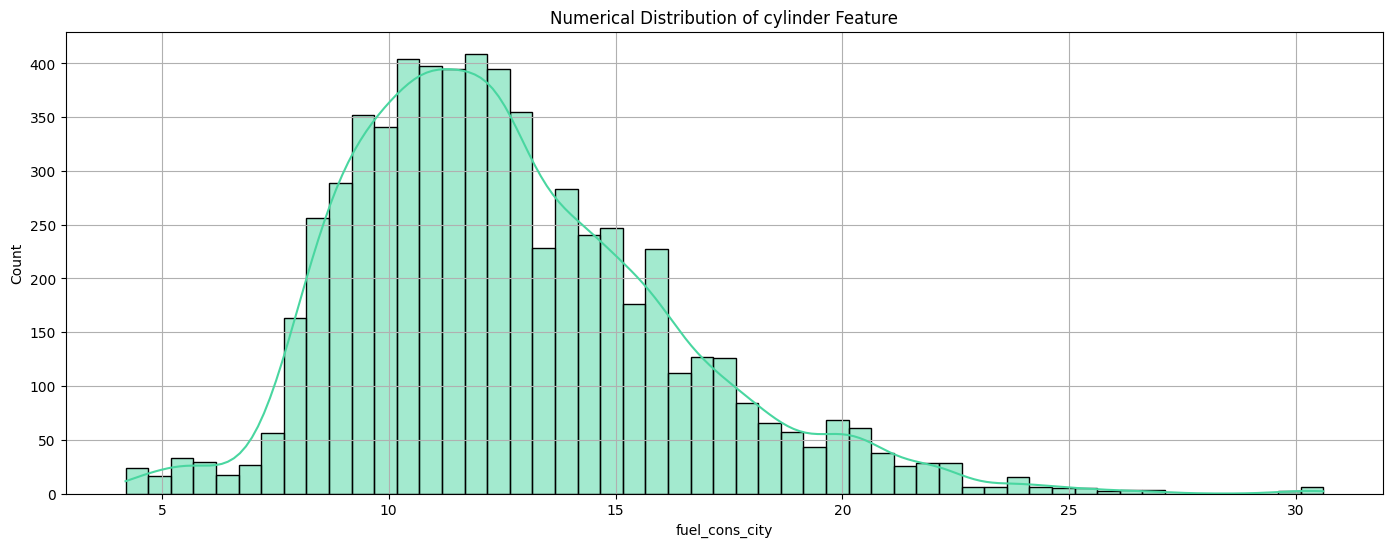

In [140]:
plt.figure(figsize=(17,6))
sns.histplot(df['fuel_cons_city'], kde=True, color="#49d6a0")
plt.title('Numerical Distribution of cylinder Feature')
plt.grid()

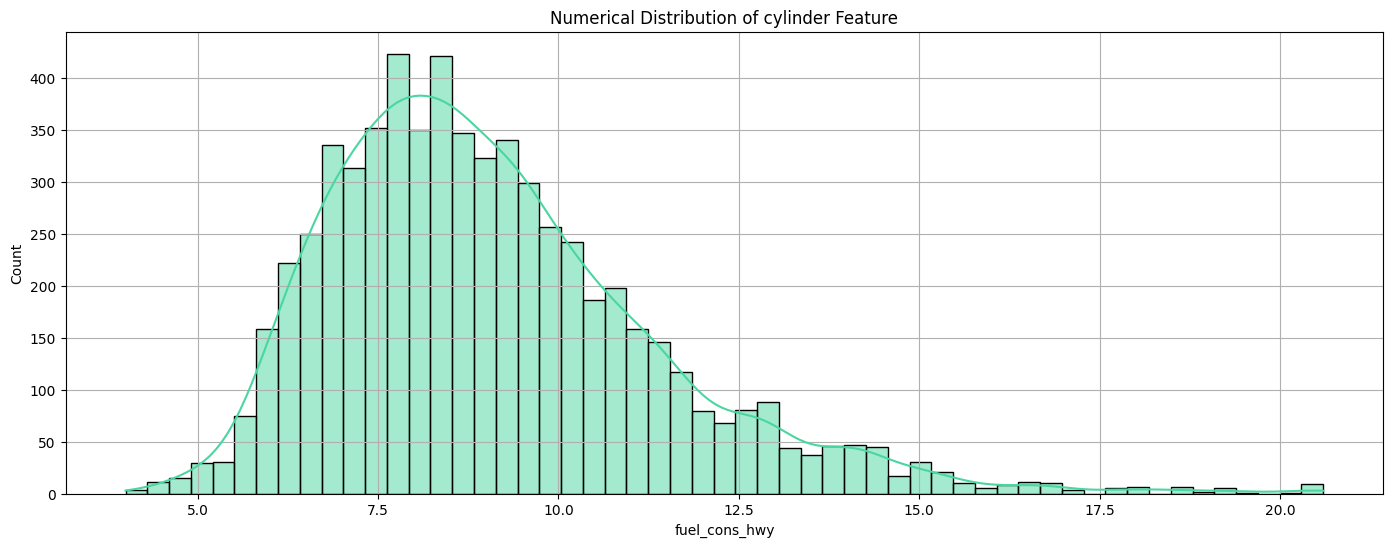

In [141]:
plt.figure(figsize=(17,6))
sns.histplot(df['fuel_cons_hwy'], kde=True, color="#49d6a0")
plt.title('Numerical Distribution of cylinder Feature')
plt.grid()

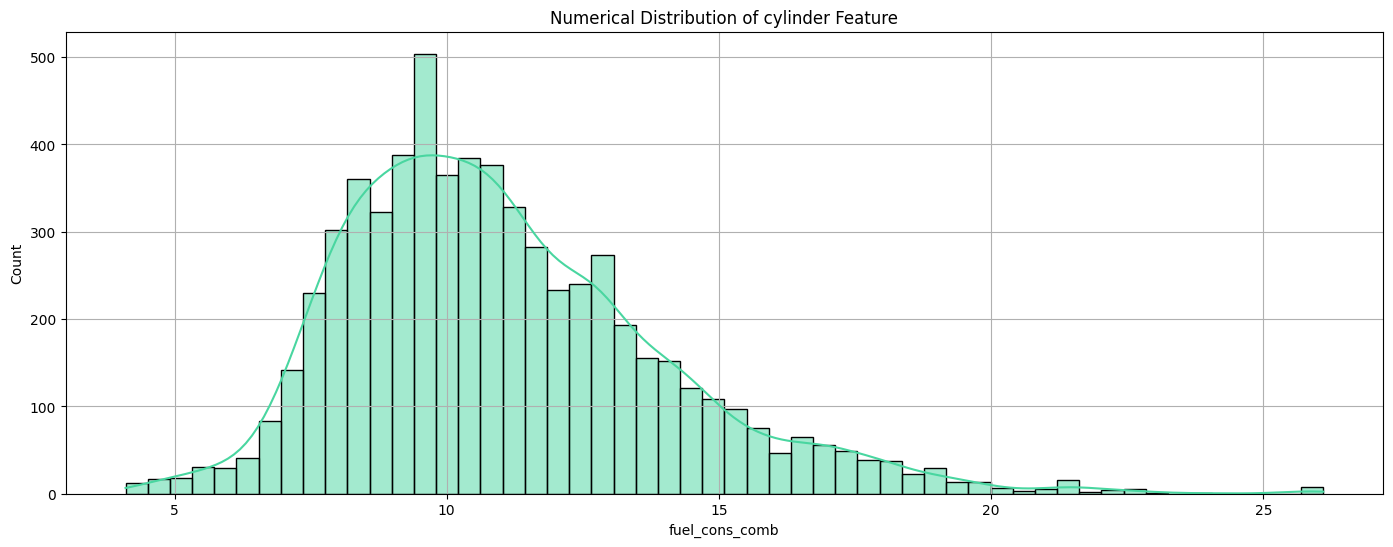

In [142]:
plt.figure(figsize=(17,6))
sns.histplot(df['fuel_cons_comb'], kde=True, color="#49d6a0")
plt.title('Numerical Distribution of cylinder Feature')
plt.grid()

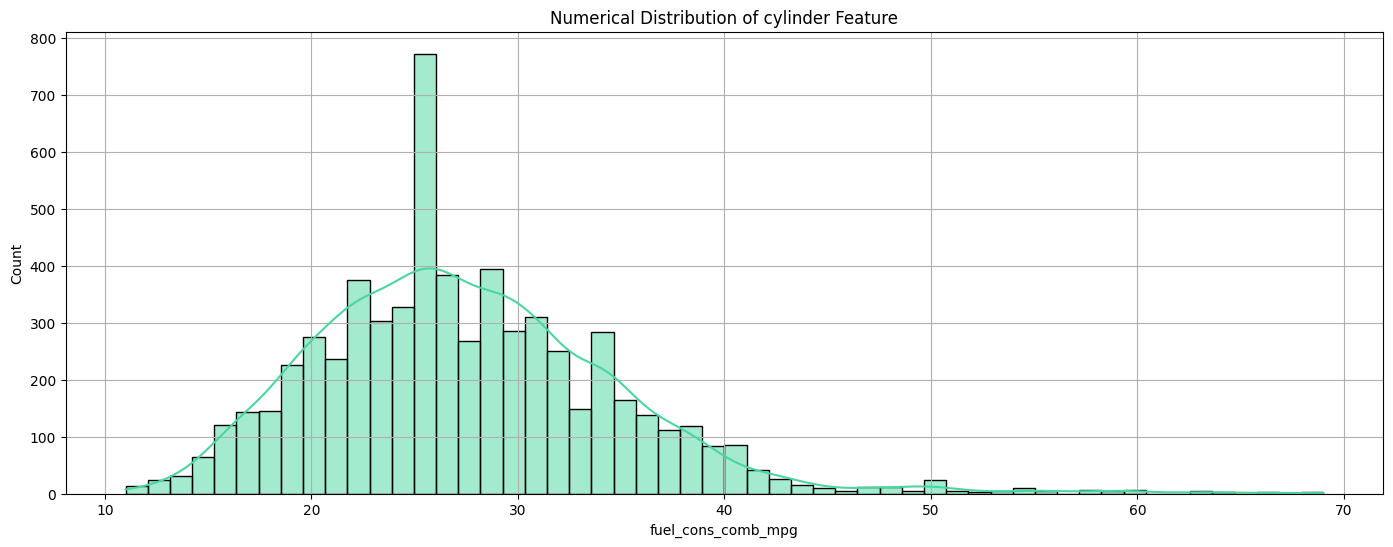

In [143]:
plt.figure(figsize=(17,6))
sns.histplot(df['fuel_cons_comb_mpg'], kde=True, color="#49d6a0")
plt.title('Numerical Distribution of cylinder Feature')
plt.grid()

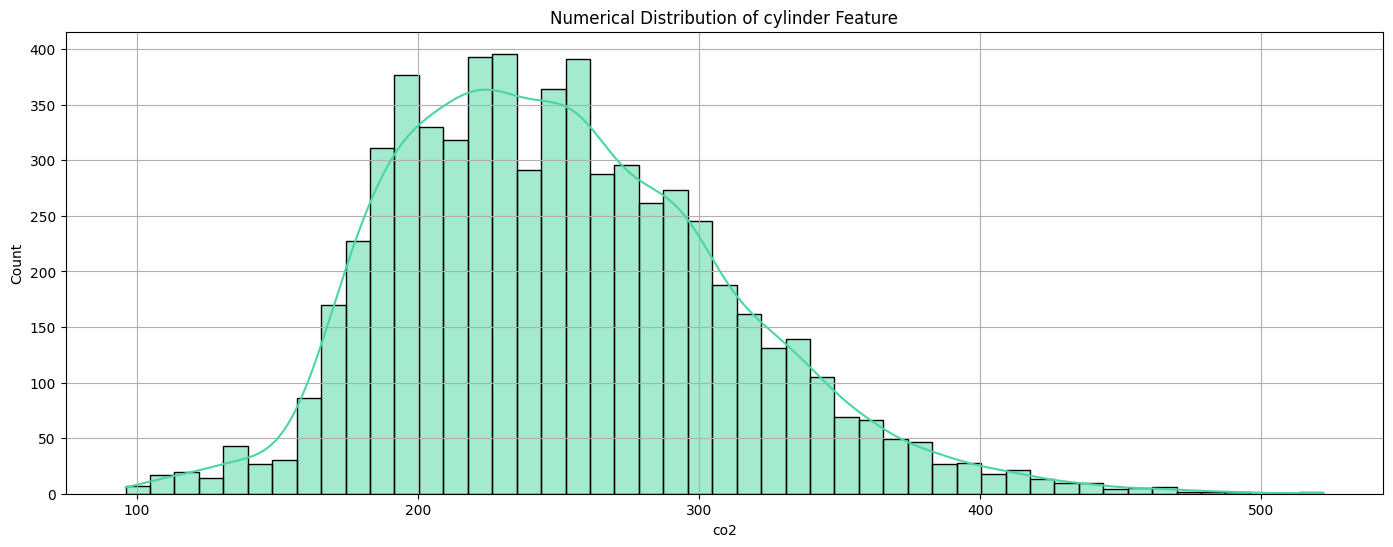

In [144]:
plt.figure(figsize=(17,6))
sns.histplot(df['co2'], kde=True, color="#49d6a0")
plt.title('Numerical Distribution of cylinder Feature')
plt.grid()

Text(0.5, 1.05, 'Feature Correlation')

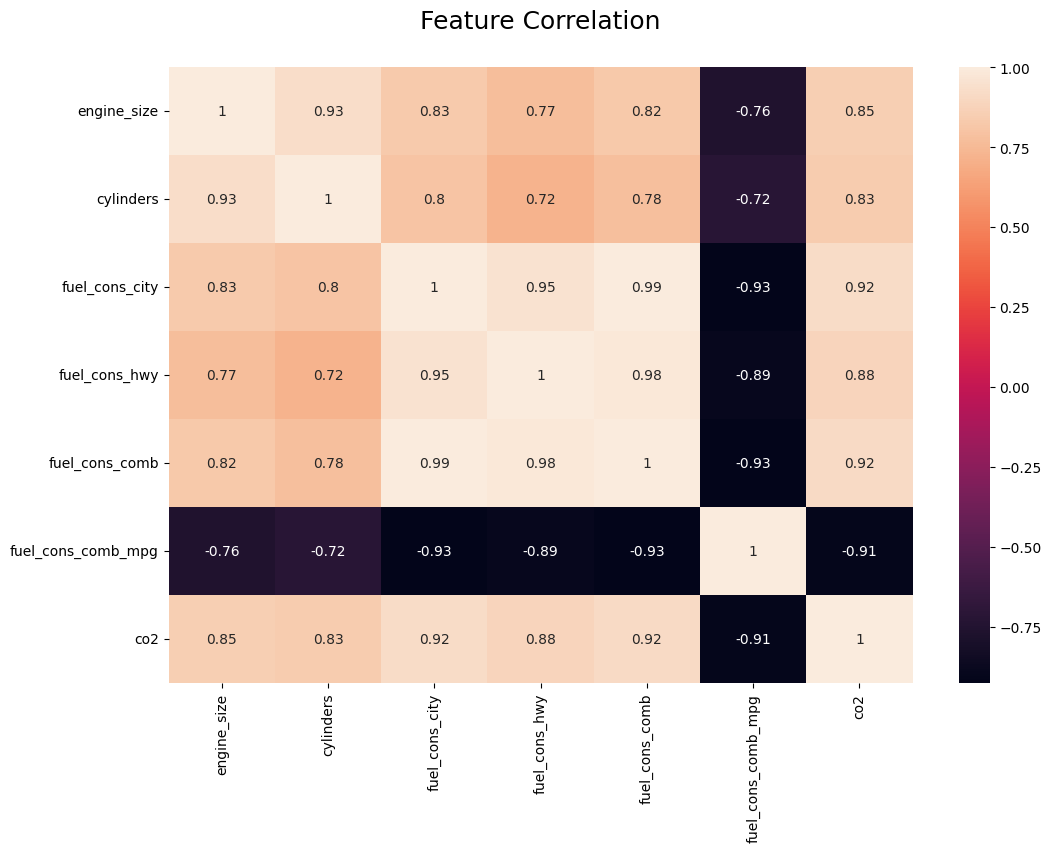

In [145]:
plt.figure(figsize=(12,8))
num_feature = df.select_dtypes(include=['number'])
# num_feature.drop(columns='id', inplace=True)
sns.heatmap(num_feature.corr(), annot=True, cmap="rocket")
plt.title('Feature Correlation', fontsize=18, y=1.05)

# Mencoba

In [146]:
df1 = df.copy()
df1.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
# menghapus kolom make dan model, karena tidak berpengaruh dalam prediksi
df1.drop(['make','model'], axis=1, inplace=True)
df1.head()

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [151]:
df['make'].nunique()

42

In [ ]:
df['model'].nunique()
# itu juga menjadi alasan tidak mencantumkannya (terlalu banyak jenisnya)

2053

In [155]:
# mengubah menjadi numerik
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [156]:
df1 = df1.apply(lambda x: object_to_int(x))
df1.head()

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,11,3.5,6,15,4,12.1,8.7,10.6,27,244


In [159]:
df1.tail()

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
7380,11,2.0,4,17,4,10.7,7.7,9.4,30,219
7381,11,2.0,4,17,4,11.2,8.3,9.9,29,232
7382,11,2.0,4,17,4,11.7,8.6,10.3,27,240
7383,12,2.0,4,17,4,11.2,8.3,9.9,29,232
7384,12,2.0,4,17,4,12.2,8.7,10.7,26,248


In [164]:
X = df.drop(columns = ['co2'])
y = df['co2']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40)
     

In [165]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [168]:
y_test_pred = model_lr.predict(X_test)
y_test_pred

array([184.25058244, 285.11559514, 261.61884046, ..., 208.4917885 ,
       278.42568563, 270.96046828])

In [170]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model_lr.predict(X_test)
y_train_pred = model_lr.predict(X_train)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"""
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
  Gap  : {abs(mse_train - mse_test):.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)


Mean Squared Error:
  Train: 299.43
  Test : 287.68
  Gap  : 11.74
R^2 Score:
  Train: 0.91
  Test : 0.92
      


In [175]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [176]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model_dt.predict(X_test)
y_train_pred = model_dt.predict(X_train)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"""
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
  Gap  : {abs(mse_train - mse_test):.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)


Mean Squared Error:
  Train: 0.73
  Test : 17.65
  Gap  : 16.92
R^2 Score:
  Train: 1.00
  Test : 1.00
      


In [177]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [178]:
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model_rf.predict(X_test)
y_train_pred = model_rf.predict(X_train)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"""
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
  Gap  : {abs(mse_train - mse_test):.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)


Mean Squared Error:
  Train: 2.36
  Test : 12.88
  Gap  : 10.52
R^2 Score:
  Train: 1.00
  Test : 1.00
      
